## Contact Process (1+1) DP

In [2]:
# pip install -r requirements.txt
import numpy as np
import matplotlib.pyplot as plt
from algorithm import update_conf, normalize_timegrid, scaling_timegrid
from initialize import initial_conf
from matplotlib.animation import FuncAnimation
import networkx as nx
import fit as ce
from main_loops import main_tau, main_gamma_nu, main_nu, main_epoch

In [36]:
# d = 1                     #dimension
# N = 20                    #number of nodes
# init_infected = 1         #number of nodes initially infected

# time_steps = 1000
# average_over = 50
# ratio_list = np.linspace(2,10,5)  #ratio = infectio_rate/recovery_rate 
# # ratio_list = np.array([2,4.67,7])

# epoch_analysis = 'ON'
# mode = 'save'

In [37]:
# init_conf = initial_conf(N, init_infected,d)

# infected_num_per_ratio = []
# infected_num_per_time = []
# rec_list = []

# for ratio in ratio_list:
#     config = init_conf.copy()
#     infected_num_per_ens = []
#     Epoch_list = []
#     for ens in np.arange(average_over):
#         config = init_conf.copy()
#         epoch_list = []

#         for t in np.arange(time_steps):
#             config, rec_list = update_conf(config, ratio, d, rec_list, 1)
#             if epoch_analysis=='ON':
#                 epoch_list.append(np.count_nonzero(config == 1))
#         if epoch_analysis=='ON':
#             scaled_timegrid = scaling_timegrid(epoch_list)
#             epoch_list      = normalize_timegrid(N, scaled_timegrid, epoch_list)[0]
#             Epoch_list.append(epoch_list)
        
#         infected_num_per_ens.append(np.count_nonzero(config==1))  #number of infected at the end

#     # Epoch_list = [x for x in Epoch_list if x[0]!=0]  #removing those who fall into zero at the begening
#     Epoch_list = [x[:np.min([len(l) for l in Epoch_list])] for x in Epoch_list] #equal length for different ens
#     infected_num_per_time.append(np.mean(Epoch_list, axis = 0))
#     infected_num_per_ratio.append(np.mean(infected_num_per_ens))

### Critical Ratio Analysis

In [44]:
# if mode == 'save':
#     np.save('data/one_d_infected_num_per_ratio.npy', infected_num_per_ratio)
#     np.save('data/one_d_infected_num_ratio_list.npy', ratio_list)
# ratio_list = np.load('data/one_d_infected_num_ratio_list.npy')
# infected_num = np.load('data/one_d_infected_num_per_ratio.npy')
# fig = plt.figure(figsize = (6,5))
# # critical ratio = 3.2978
# plt.scatter(ratio_list, infected_num , marker = '.', color = 'black')
# plt.xlabel("$\lambda$/r")  
# plt.ylabel("Number of Infected Nodes")
# # plt.xlim(1, 7)
# plt.grid(ls= 'dotted')
# plt.vlines(x=3.297, ymin=0, ymax=10, colors='red', ls=':', lw=2, label='Critical Ratio: ($\lambda$/r): 3.29')
# plt.legend(loc='best')
# fig.savefig("plots/one_dim/critical_ratio.png", bbox_inches = 'tight')

### Epoch Analysis

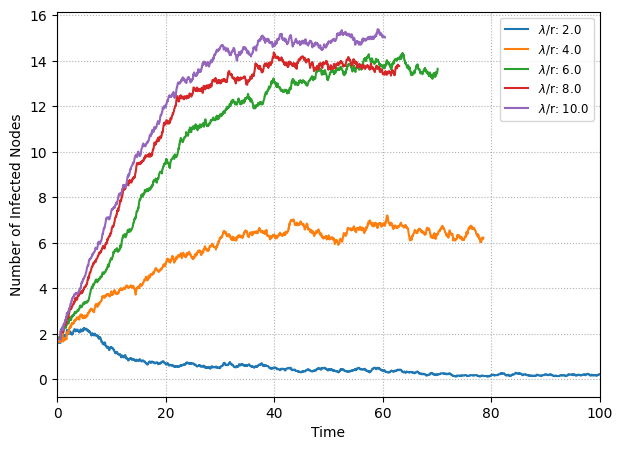

In [43]:
# # if mode == 'save':
# #     np.save('data/one_d_infected_num_per_time.npy', [gooz[:700] for gooz in infected_num_per_time])
# # infected_num = np.load('data/one_d_infected_num_per_time.npy')

# infected_num = infected_num_per_time
# label_list   = ratio_list
# fig          = plt.figure(figsize = (7,5))

# fix_grid =[]
# fixed_interval = 1/N

# for e in range(len(infected_num)):
#     fix_grid.append([i* fixed_interval for i in np.arange(len(infected_num[e]))])
#     plt.plot(fix_grid[e], infected_num[e], label = '$\lambda$/r: '+str(round(label_list[e],1)))

# plt.xlabel("Time")
# plt.xlim(0,100)
# plt.ylabel("Number of Infected Nodes")
# plt.legend(loc='best', fontsize = 8.5)
# plt.grid(ls= 'dotted')
# fig.savefig("plots/one_dim/epoch.png", bbox_inches = 'tight')

## DyP (P2=0, P2 >0)
In case of dynamical percolation, besides p1 which is the probablity to be infected for the fist time, we have also p2 which is the porbability to be infected for the second time.

### Manual Analysis

In [109]:
# d = 2                     #dimension
# N = 20                    #lentgh of lattce
# init_infected = 1         #number of nodes initially infected
# time_steps = 10000     #maximum iteration
# average_over = 500
# # ratio_list = np.linspace(0.7,1.5 , 6)  #ratio = infection_rate/recovery_rate #best ratio = 4.68
# # ratio_list = [4.68]
# p_2 = 0       #prob of get infected after being recovered

In [6]:
# init_conf = initial_conf(N, init_infected, d)

# rec_list =           []
# anim_list =          []
# big_list =           []
# big_epoch_list =     []
# big_recovered_list = []
# big_cluster_list   = []

# for ratio in ratio_list:
#     config = init_conf.copy()
#     each_ratio_list =     []
#     Epoch_list =          []
#     each_recovered_list = []
#     each_cluster_list   = []

#     for ens in np.arange(average_over):
#         config = init_conf.copy()
#         epoch_list = []
#         rec_list   = []

#         for t in np.arange(time_steps):
#             if np.count_nonzero(config == 1)==0:
#                 break
            
#             #animation (just two states)
#             for_anim = config.copy( )
#             anim_list.append(for_anim) 

#             #main update
#             config, rec_list = update_conf(config, ratio, d, rec_list, p_2)
#             #epoch analysis

#             epoch_list.append(np.count_nonzero(config == 1))
        
#         Epoch_list.append(epoch_list)
#         each_ratio_list.append(np.count_nonzero(config == 1))  #number of infected for each esnemble
#         each_recovered_list.append(len(rec_list))              #number of recovered for each ensemble
#         each_cluster_list.append(len(rec_list))

#     big_epoch_list.append(np.mean(Epoch_list, axis = 0))       #number of infected per time averaged 
#     big_list.append(np.mean(each_ratio_list))                  #number of infted for each ratio
#     big_recovered_list.append(np.mean(each_recovered_list))    #number of recovered for each ratio
#     big_cluster_list.append(each_cluster_list)                 #dist. of sizes of clusters for differnet ratios

# anim_list = np.array(anim_list)
# np.save('data/anim_data.npy', anim_list)


### Number of Infected and Infected per Time

In [191]:
# np.save('data/num_inf_per_time_p0.npy',   big_epoch_list)   #p2 = 0  #this file is corrupt, run again
# np.save('data/num_inf_per_time_p0.2.npy', big_epoch_list)   #p2 = 0.2
# np.save('data/num_inf_per_time_p0.5.npy', big_epoch_list)   #p2 = 0.5

In [18]:
# p1 = np.load('data/num_inf_per_time_p0.npy')[0]
# p2 = np.load('data/num_inf_per_time_p0.2.npy')[0]
# p3 = np.load('data/num_inf_per_time_p0.5.npy')[0]

# fig = plt.figure(figsize = (6,5))
# plt.plot(np.arange(len(p1)),  p1  , label= "p2 = 0")
# plt.plot(np.arange(len(p2)),  p2  , label= "p2 = 0.2")
# plt.plot(np.arange(len(p3)),  p3  , label= "p2 = 0.5")
# plt.legend(loc= 'best')
# plt.xlabel("Time")
# plt.ylabel("Number of Infected")
# plt.grid(ls= 'dotted')
# fig.savefig("plots/two_dim/inf_num_per_time_L20_ratio4.68_avg1.png", bbox_inches = 'tight')

## Critical Exponents

### Critical Ratio and Tau

The prob. of number of recovered being greater than s is power law, the ratio in which it happens is the critical ratio. we can estimate tau, consider exponent of t^(exp). exp = 2-tau. (for p=0, best ratio: 4.68, tau: 2.055)

In [106]:
ratio_list = np.linspace(1,3,5)
N   = 20
p_2 = 0.7
avg = 500
mode = 'save'

In [107]:
if mode=='save':
    np.save('data/tau_big_cluster_p{}.npy'.format(p_2), main_tau(N, ratio_list, avg, p_2))
    np.save('data/tau_ratio_p{}.npy'.format(p_2), ratio_list)

big_cluster_list = np.load('data/tau_big_cluster_p{}.npy'.format(p_2))
ratio_list = np.load('data/tau_ratio_p{}.npy'.format(p_2))

Critical Ratio: 2.0
Estimated Tau 2.24
R-squared 0.93


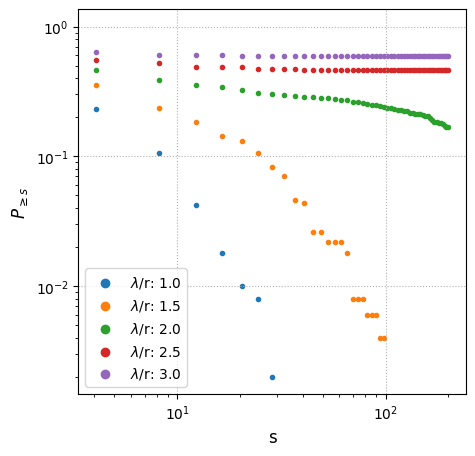

In [111]:
fig = plt.figure(figsize = (5,5))
label_list = ['$\lambda$/r: '+str(round(i,2)) for i in ratio_list]

score_list = []
tau_list   = []

for i in range(len(big_cluster_list)):
    size_dist = np.array(big_cluster_list[i])
    label = label_list[i]
    s = np.linspace(0, 200, 50)
    prob = np.zeros(len(s))

    for j in range(len(s)):
        size = s[j]
        prob[j] = len(size_dist[size_dist >= size])/len(size_dist)

    prob = prob[prob != 0]
    s = s[:len(prob)]

    est_tau, score, model = ce.fit(s, prob)
    score_list.append(score)
    tau_list.append(est_tau)

    plt.scatter(s, prob, marker='.', label = label)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("s", size = 12)
    plt.ylabel(r"$P_{\geq s}$", size = 12)
    plt.legend(markerscale = 2, fontsize =10)
    plt.grid(ls='dotted')

index_best = np.where(score_list == np.max(score_list))[0][0]
critical_ratio = ratio_list[index_best]
estimated_tau  = tau_list[index_best][0]
print('Critical Ratio:', round(critical_ratio,2))
print('Estimated Tau', round(2 - estimated_tau,2) )
print('R-squared',     round(np.max(score_list),2))
fig.savefig("plots/two_dim/Tau_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')

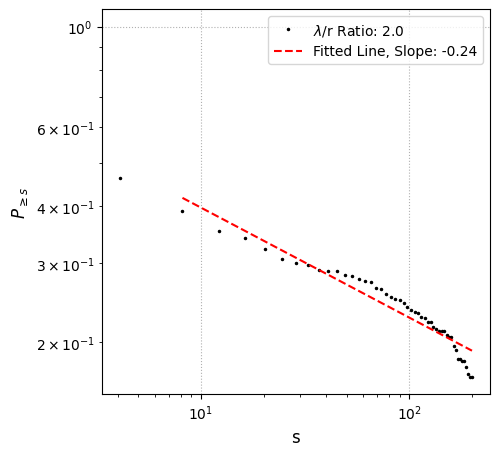

In [112]:
#retrieving the critical ratio prob list and size list
size_dist = np.array(big_cluster_list[np.where(ratio_list==critical_ratio)[0][0]])
s = np.linspace(0, 200, 50)
prob = np.zeros(len(s))
for j in range(len(s)):
    size = s[j]
    prob[j] = len(size_dist[size_dist >= size])/len(size_dist)

prob = prob[prob != 0]
s = s[:len(prob)]
est_tau, score, model = ce.fit(s, prob)

fig = plt.figure(figsize = (5,5))
label = '$\lambda$/r Ratio: ' + str(round(critical_ratio,2))
plt.plot(s, prob, marker = ".", linestyle = "None", markersize = 3,
         c = "black", label = label)
plt.plot(s[2:], s[2:]**(model.coef_)*np.exp(model.intercept_),
         c = "red", linestyle = "--", label = "Fitted Line, Slope: {}".format(round(model.coef_[0],2)))

plt.xscale("log")
plt.yscale("log")
plt.xlabel("s", size = 12)
plt.ylabel(r"$P_{\geq s}$", size = 12)
plt.legend(loc='best', fontsize =10)
plt.grid(ls='dotted')
fig.savefig("plots/two_dim/Tau_fit_p{}_L{}_avg{}.png".format(p_2, N, avg),bbox_inches ='tight')

### Gamma/Niu Estimation
Mean number of recovered is plotted per differnt length. the expnent is gamma/nu. for p=0 gamma/nu: 1.79

In [113]:
p_2 = 0.7
c_r = 2
L_list = np.arange(20,70,5)
average_over = 50
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading


R-squared: 0.7
Estimated GammaNu: 0.94


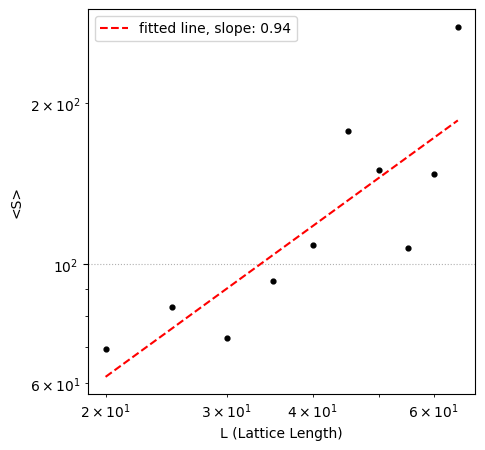

In [114]:
if mode !='load':
    np.save('data/gamma_niu_average_recovered_p{}.npy'.format(p_2), 
            main_gamma_nu(L_list, average_over, p_2, c_r)[0])
    np.save('data/gamma_niu_length_list_p{}.npy'.format(p_2), L_list)
big_recovered_list = np.load('data/gamma_niu_average_recovered_p{}.npy'.format(p_2))
L_list             = np.load('data/gamma_niu_length_list_p{}.npy'.format(p_2))
score_list =     []
GammaNu_list =   []
Gamma_nu, score,  model = ce.fit(L_list, big_recovered_list)
score_list.append(score)
GammaNu_list.append(Gamma_nu)
print('\nR-squared:',   round(score,2))
print('Estimated GammaNu:', round(Gamma_nu[0],2))
fig = plt.figure(figsize = (5,5))
plt.scatter(L_list, big_recovered_list, s=12, c = "black")
plt.plot(L_list, np.array(L_list)**model.coef_*np.exp(model.intercept_), c = "red",
         linestyle = "--", label = "fitted line, slope: {}".format(round(model.coef_[0], 2)))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("L (Lattice Length)")
plt.ylabel("<S>")
plt.grid(ls = 'dotted')
plt.legend(loc='best')
plt.show()
fig.savefig("plots/two_dim/gammaNu_est_avg{}_p{}_ratio{}.png".format(average_over, p_2, c_r),bbox_inches = 'tight')

### Nu estimation

cosidering the realtion between SL^(GammaNu) per (C-Cc)*(L(1/Nu)) for different values of L. Cc is the critical ratio found previously. for p=0: Nu: 1.33

In [116]:
p_2 = 0.7
c_r = 2
est_GammaNu = 0.94
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading

#manualy should be tested over differnet values for Nu
Nu = 0.5  #best Nu value for p0: 1.33

L_list = np.arange(20,70,15)
avg = 10
c_rec = 1/(1+c_r)
ratio_list = np.linspace(1,9,5)
rec_rate = 1/(1+ ratio_list)

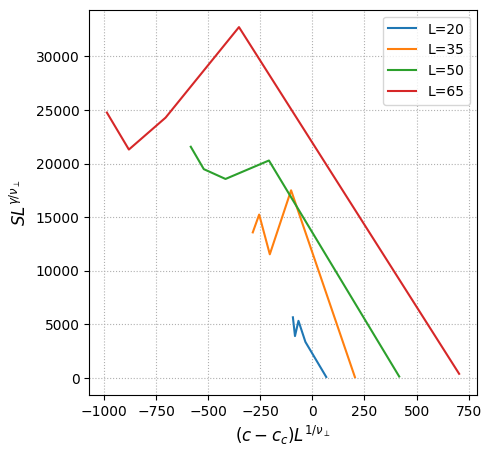

In [117]:
if mode !='load':
    np.save('data/nu_Y_axis_p{}.npy'.format(p_2), 
            main_nu(L_list, ratio_list, avg, p_2, c_r, est_GammaNu))
    np.save('data/nu_X_axis_p{}.npy'.format(p_2), ratio_list)

Y_list = np.load('data/nu_Y_axis_p{}.npy'.format(p_2))
X_list = np.load('data/nu_X_axis_p{}.npy'.format(p_2))

label_list = ["L="+str(L_list[i]) for i in range(len(L_list))]

fig = plt.figure(figsize = (5,5))
for l in range(len(L_list)):
    X = (rec_rate - c_rec) * (L_list[l]**(1/Nu))
    Y = Y_list[l]
    plt.plot(X, Y,mfc = "None", markersize = 5, label = label_list[l])

plt.ylabel(r"$SL^{\gamma/\nu_\perp}$", size = 12)
plt.xlabel(r"$(c-c_c)L^{1/\nu_\perp}$", size = 12)
plt.grid(ls = 'dotted')
plt.legend(loc = 'best')
plt.show()

fig.savefig("plots/two_dim/Nu_est_avg{}_p{}_ratio{}.png".format(average_over, p_2, c_r),bbox_inches = 'tight')

### Beta Estimation

M = L^((Beta+2Gamma)/Nu)
M = <number of recovered^2>  for p2=0 beta: 0.131

In [118]:
p_2 = 0.7
c_r = 2
est_GammaNu = 0.94
est_Nu      = 0.5
mode = 'save'   #for saving new result, otherwise, set 'load' for just loading

L_list = np.arange(20,70, 5)
avg = 50


R-squared 0.687
Estimated Exponent 0.976
Beta: -0.452


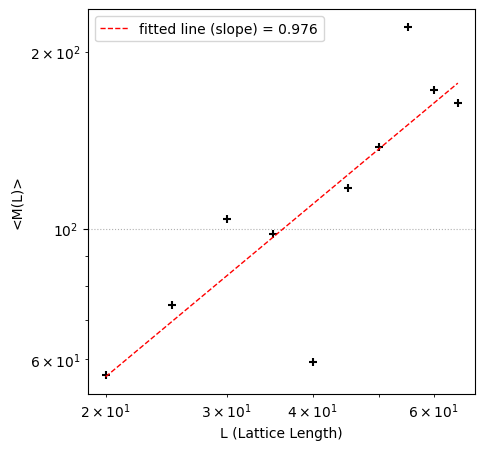

In [119]:
if mode !='load':
    np.save('data/beta_Y_p{}.npy'.format(p_2), main_gamma_nu(L_list, avg, p_2, c_r)[0])
    np.save('data/beta_X_p{}.npy'.format(p_2), L_list)
M_list = np.load('data/beta_Y_p{}.npy'.format(p_2))
L_liss = np.load('data/beta_X_p{}.npy'.format(p_2))

est_exp,score, model = ce.fit(L_list, M_list)
print('\nR-squared',         round(score,3))
print('Estimated Exponent',   round(est_exp[0],3))

###############################################
est_Gamma = est_GammaNu * est_Nu
beta = est_exp[0] * est_Nu - (2* est_Gamma)
###############################################

print('Beta:', round(beta,3))

fig = plt.figure(figsize = (5,5))
plt.scatter(L_list, M_list, marker = '+', color = 'black')
plt.plot(L_list, np.array(L_list)**model.coef_*np.exp(model.intercept_), c = "red",
         linestyle = "--", linewidth = 1,
         label = r"fitted line (slope) = {}".format(round(model.coef_[0], 3)))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("L (Lattice Length)")
plt.ylabel("<M(L)>")
plt.grid(ls= 'dotted')
plt.legend(loc='best')
plt.show()
fig.savefig("plots/two_dim/beta_est_avg{}_p{}_ratio{}.png".format(avg, p_2, c_r),bbox_inches = 'tight')

## Epoch Trend

In [21]:
# p_2 = 0.7
# ratio_list = np.linspace(3,8,4)
# mode = 'save'
# N = 20
# time_steps = np.arange(1000)
# avg = 50

In [22]:
# big_num_inf    = main_epoch(N, time_steps, ratio_list, avg, p_2)
# ratio_list     = ratio_list

In [38]:
# fig = plt.figure(figsize = (5,5))
# label_list = ['$\lambda$/r: '+str(round(i,2)) for i in ratio_list]

# score_list   = []
# theta_list   = []

# for i in range(len(big_num_inf)):
#     num_inf = np.array(big_num_inf[i])
#     label = label_list[i]
#     plt.plot(np.arange(len(num_inf)), num_inf, label = label)
#     plt.xlabel("Time", size = 12)
#     plt.ylabel(r"Number of Infected", size = 12)
#     plt.legend(markerscale = 2, fontsize =10)
#     plt.xlim(0,1000)
#     plt.grid(ls='dotted')

# # fig.savefig("plots/two_dim/epoch_p{}.png".format(p_2),bbox_inches = 'tight')